In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Load the dataset
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
# Data inspection
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (891, 12)
Test data shape: (418, 11)


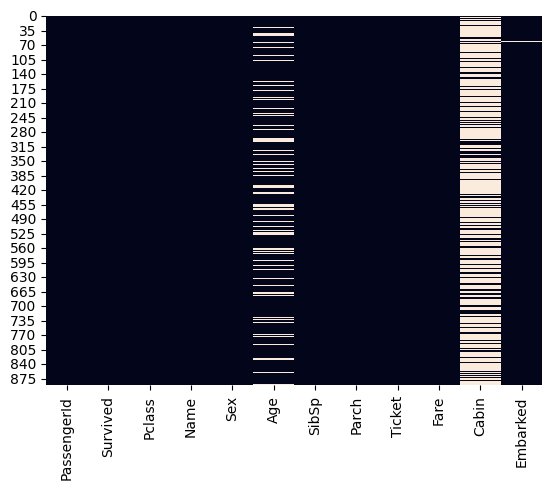

In [4]:
# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False)
plt.show()

In [5]:
# Print the age % of NaN values
age_nan_percent = train_data['Age'].isna().mean() * 100
print(f"Il y a {age_nan_percent:.2f}% d'âge qui manquent")

Il y a 19.87% d'âge qui manquent


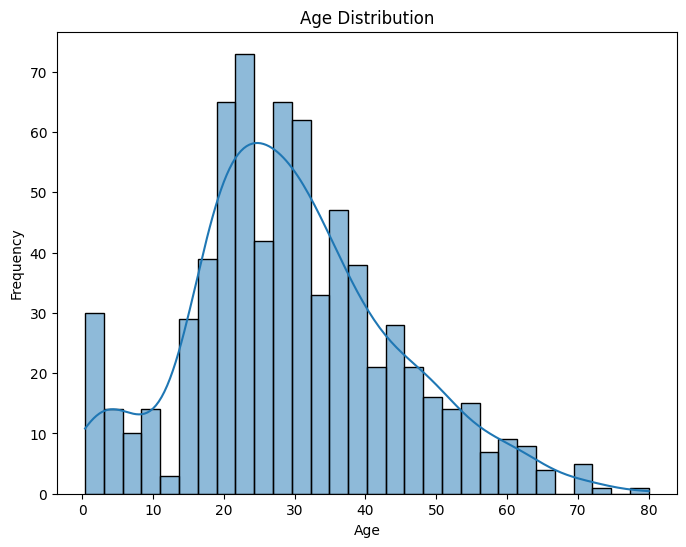

In [6]:
# Plot the histogram of the age column
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Print the median and mean of the age column
age_mean = train_data['Age'].mean()
age_median = train_data['Age'].median()
print(f"Moyenne : {age_mean:.2f}")
print(f"Médiane : {age_median:.2f}")

Moyenne : 29.70
Médiane : 28.00


In [8]:
# Print the cabin % of NaN values
cabin_nan_percent = train_data['Cabin'].isna().mean() * 100
print(f"Il y a {cabin_nan_percent:.2f}% de Cabin qui manquent")

Il y a 77.10% de Cabin qui manquent


Distribution des passagers par port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


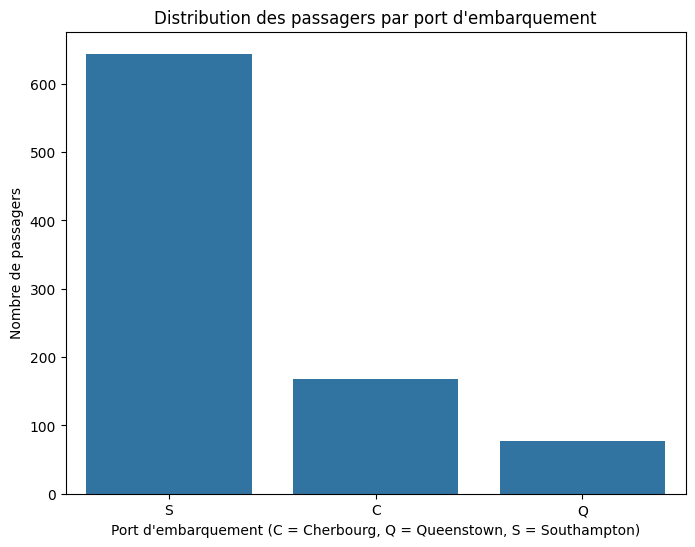

In [9]:
# Print the embarked distribution
embarked_distribution = train_data['Embarked'].value_counts()
print("Distribution des passagers par port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton):")
print(embarked_distribution)

# Display the embarked distribution with a histogram
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Embarked')
plt.title('Distribution des passagers par port d\'embarquement')
plt.xlabel('Port d\'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Nombre de passagers')
plt.show()

In [10]:
# Impute missing "Age" with the median (28)
train_data['Age'].fillna(28, inplace=True)

# Impute missing "Embarked" with the most common value (mode), which is 'S'
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
train_data.drop(columns=['Cabin'], inplace=True)

# Verify the changes
print("Train Data after preprocessing:")
print(train_data.isnull().sum())  # Check for missing values



Train Data after preprocessing:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\boula\AppData\Local\Temp\ipykernel_18024\3407148447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(28, inplace=True)
C:\Users\boula\AppData\Local\Temp\ipykernel_18024\3407148447.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

C:\Users\boula\AppData\Local\Temp\ipykernel_18024\3030956796.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(28, inplace=True)


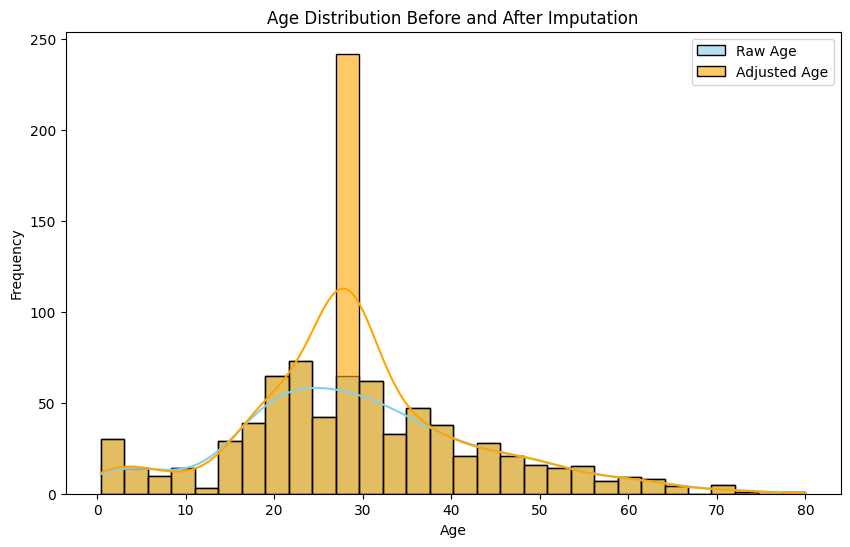

In [11]:
train_data = pd.read_csv('data/train.csv')

# Create a copy of the "Age" column before imputation for comparison
age_before_imputation = train_data['Age'].copy()

# Impute missing "Age" values with the median (28)
train_data['Age'].fillna(28, inplace=True)
age_after_imputation = train_data['Age']

# Plot the histogram of "Age" before and after imputation on the same plot
plt.figure(figsize=(10, 6))
sns.histplot(age_before_imputation, kde=True, color='skyblue', label='Raw Age', bins=30, alpha=0.6)
sns.histplot(age_after_imputation, kde=True, color='orange', label='Adjusted Age', bins=30, alpha=0.6)

# Add title and labels
plt.title('Age Distribution Before and After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a legend to distinguish between the two distributions
plt.legend()

# Show the plot
plt.show()

In [12]:
# Create the 'TravelAlone' feature
train_data['TravelAlone'] = ((train_data['SibSp'] == 0) & (train_data['Parch'] == 0)).astype(int)

# Display the output with selected columns
print(train_data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'TravelAlone']].head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Embarked  TravelAlone  
0         A/5 21171   7.2500        S            0  
1          PC 17599  71.2833        C            0  
2  STON/O2. 3101282   7.9250        S            1  
3            113803  53.1000        S            0  
4            373450   8.0500        S            1  


In [13]:
# Encode the categorical features with pd.get_dummies
train_data_encoded = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)

# Display the first few rows to verify the changes
print(train_data_encoded.head())


   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  TravelAlone  Pclass_1  \
0  22.0      1      0         A/5 21171   7.2500   NaN            0     False   
1  38.0      1      0          PC 17599  71.2833   C85            0      True   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN            1     False   
3  35.0      1      0            113803  53.1000  C123            0      True   
4  35.0      0      0            373450   8.0500   NaN            1     False   

   Pclass_2  Pclass_3  Embarked_C  Emb

In [14]:
# Drop columns that are not needed for the analysis
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Embarked_S', 'Sex_female']
train_data_final = train_data_encoded.drop(columns=columns_to_drop, axis=1)

# Display the first few rows to verify the results
print(train_data_final.head())

   Survived   Age  SibSp  Parch     Fare Cabin  TravelAlone  Pclass_1  \
0         0  22.0      1      0   7.2500   NaN            0     False   
1         1  38.0      1      0  71.2833   C85            0      True   
2         1  26.0      0      0   7.9250   NaN            1     False   
3         1  35.0      1      0  53.1000  C123            0      True   
4         0  35.0      0      0   8.0500   NaN            1     False   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Sex_male  
0     False      True       False       False      True  
1     False     False        True       False     False  
2     False      True       False       False     False  
3     False     False       False       False     False  
4     False      True       False       False      True  


In [15]:


test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data.drop(columns=['Cabin'])
test_data['TravelAlone'] = (test_data['SibSp'] + test_data['Parch'] == 0).astype(int)
test_data_encoded = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)

print(test_data_encoded.isnull().sum())

print("Test Data after preprocessing:")
print(test_data_encoded.head())


PassengerId      0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
TravelAlone      0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64
Test Data after preprocessing:
   PassengerId                                          Name   Age  SibSp  \
0          892                              Kelly, Mr. James  34.5      0   
1          893              Wilkes, Mrs. James (Ellen Needs)  47.0      1   
2          894                     Myles, Mr. Thomas Francis  62.0      0   
3          895                              Wirz, Mr. Albert  27.0      0   
4          896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1   

   Parch   Ticket     Fare Cabin  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0      0   330911   7.8292   NaN            1     False     False      True   
1      0   3

C:\Users\boula\AppData\Local\Temp\ipykernel_18024\2175347832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


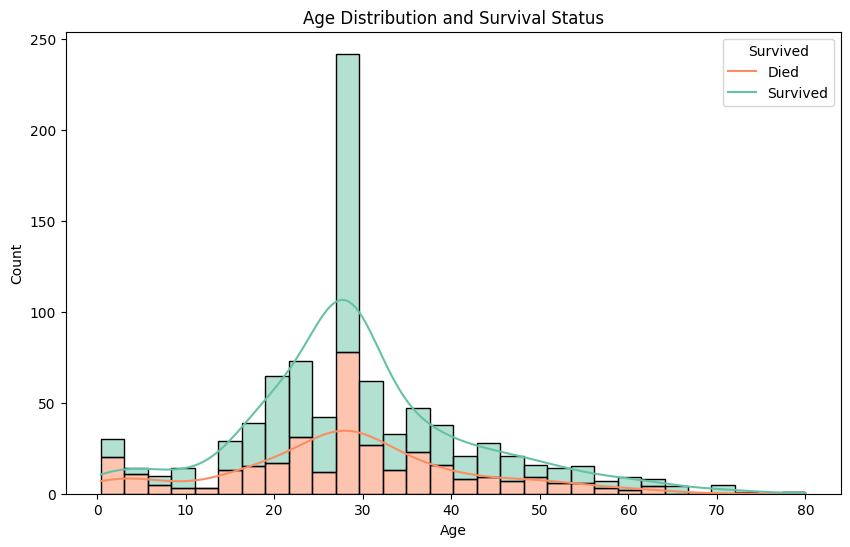

In [16]:
# Plot the distribution of 'Age' with survival status
plt.figure(figsize=(10,6))
sns.histplot(train_data, x='Age', hue='Survived', multiple='stack', kde=True, palette='Set2')
plt.title('Age Distribution and Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

In [17]:
# Create the "IsMinor" variable
train_data['IsMinor'] = (train_data['Age'] < 16).astype(int)

# Verify the new column
print(train_data[['PassengerId', 'Age', 'IsMinor']].head())

   PassengerId   Age  IsMinor
0            1  22.0        0
1            2  38.0        0
2            3  26.0        0
3            4  35.0        0
4            5  35.0        0


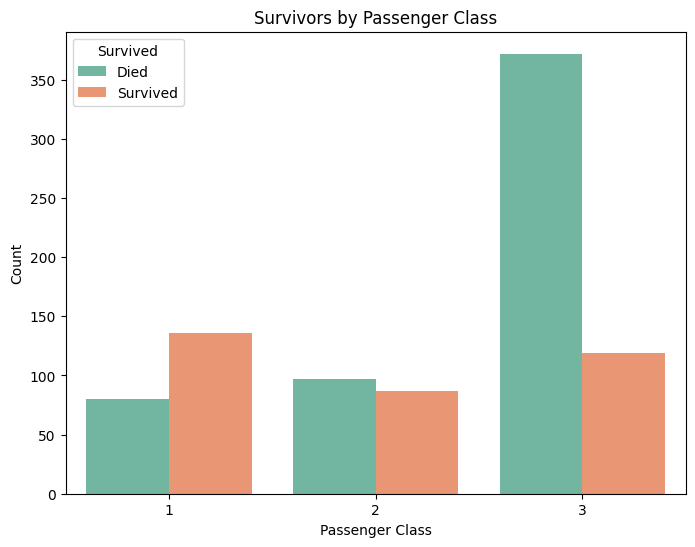

In [19]:
# Plot survivors by passenger class
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

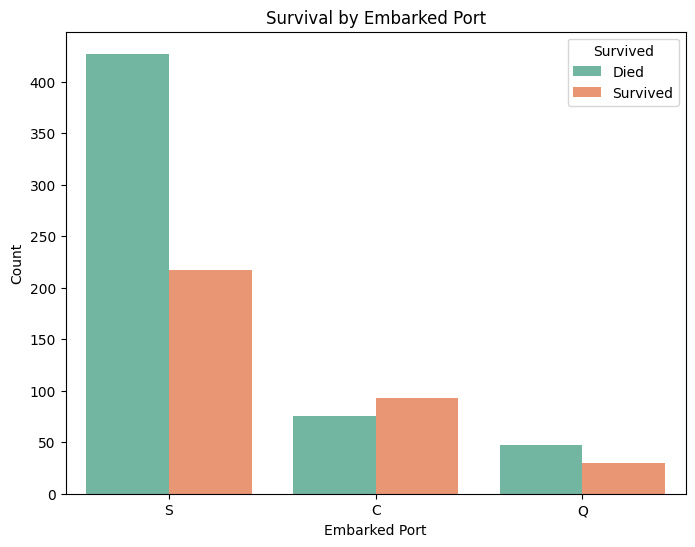

In [20]:
# Plot survival by Embarked port
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='Set2')
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

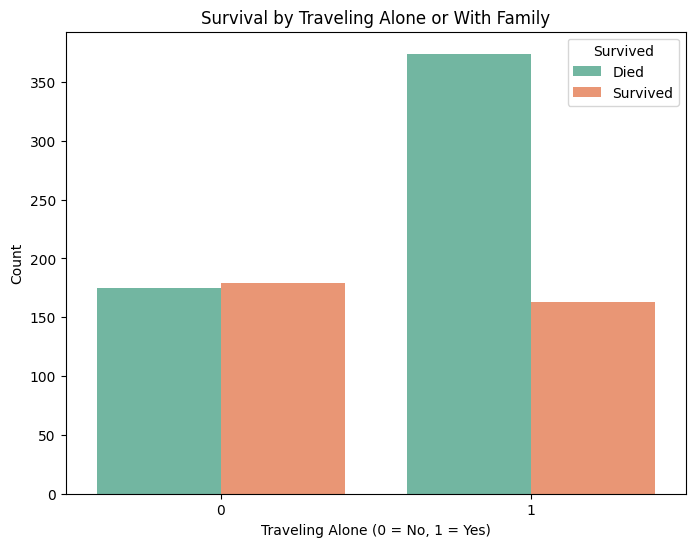

In [21]:
# Plot survival status by traveling alone
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='TravelAlone', hue='Survived', palette='Set2')
plt.title('Survival by Traveling Alone or With Family')
plt.xlabel('Traveling Alone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

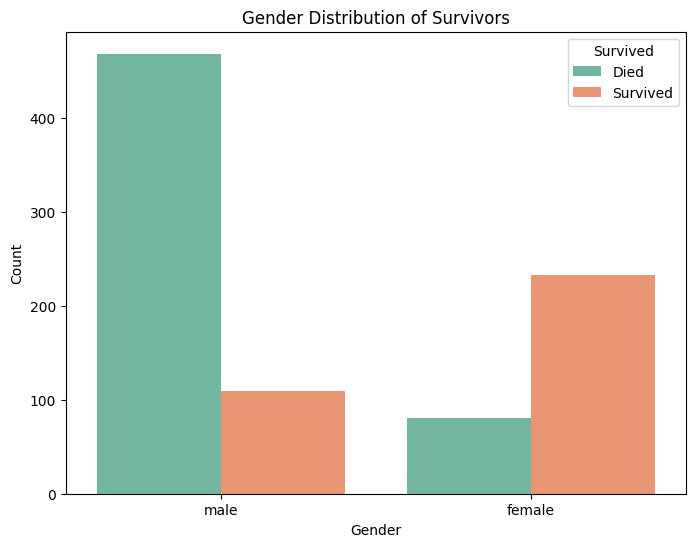

In [22]:
# Plot survival by gender
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='Set2')
plt.title('Gender Distribution of Survivors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()